## Backbone network는 computer vision task의 핵심적인 구성요소

가장 중요한 **ResNet**과
이후 ResNet의 영향을 받아 만들어진
**pre-activation ResNet, DenseNet, SENet** 이 있다.

또한, 모델 최적화를 위해 **Neural Architecture Search, EfficientNet**이 있다.
***

### 일반적인 논문의 형식적 구조

초록(abstract) -> 서론(introduction) 및 관련 연구(related work) -> 제안하는 방법에 관한 이론 설명-> 실험(experiments) -> 결론(conclusion)
***

### 1. ResNet

**1) ResNet 논문의 문제의식 : Degradation Problem**

딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생하는데, 이것은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제이다.

**2) ResNet 논문이 제시한 솔루션 : Residual Block**

ResNet은 깊은 네트워크의 학습이 어려운 점을 해결하기 위해서 레이어의 입력값을 활용하여 레이어가 "residual function"(잔차 함수)을 학습하도록 한다.

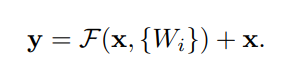

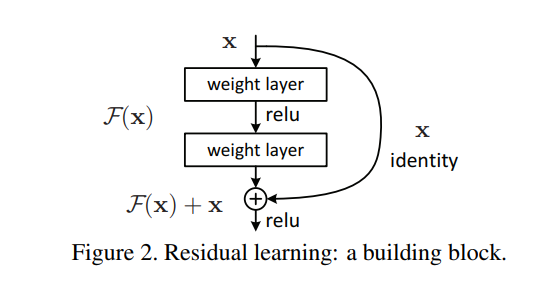

 Residual 레이어를 F(x)로 표현하면 이 레이어의 결과는 입력값 x에 대해 F(x)가 된다. 여기에 레이어의 입력값 x을 더해주면 최종 출력값은 F(x)+x, 즉 우리가 보통 생각하는 레이어의 결괏값이 된다. 이후 이 값은 ReLU 활성함수(activation function)을 거치게 된다. 
 
 위 식에서 F(x,{W i​}) 는 학습되어야 할 residual mapping으로서 잔차 학습(residual learning)은 이 식을 학습한다. ResNet에서는 shortcut connection을 가진 ResNet의 기본 블록을 Residual Block이라고 부른다. ResNet은 이러한 Residual Block 여러 개로 이루어진다.
 
    여기서 블록이란?
    
        반복되는 레이어 구조를 묶고, 각 구조 속에서 조금씩 바뀌는 부분은 변수로 조정할 수 있게끔 만들면 레이어 구조를 바꾸며 실험을 할 때에도 편리하다. 레이어를 묶은 모듈을 "블록"이라고 부르며, 일반적으로 조금씩 변형을 준 블록을 반복적으로 쌓아 딥러닝 모델을 만든다.
        
**3) Experiments**

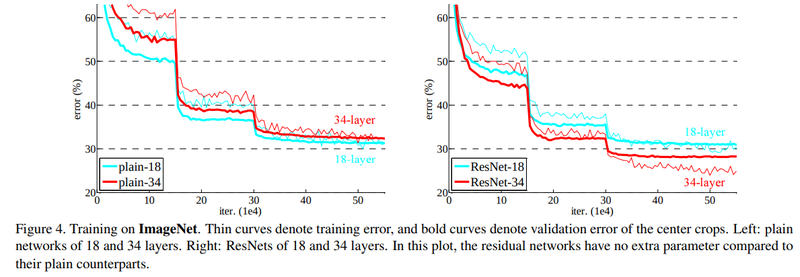

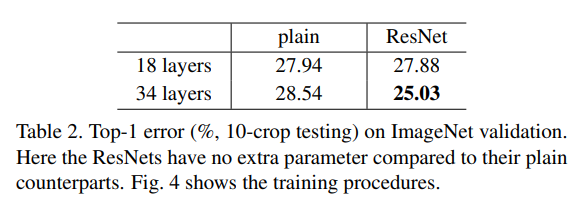

일반 네트워크("plain")는 레이어가 16개나 늘어나 네트워크가 깊어졌는데도 오류율은 오히려 높아졌다. 경사소실로 인해 훈련이 잘되지 않았기 때문이다. ResNet에서는 잘 훈련된 레이어가 16개 늘어난 효과로 오류율이 2.85% 감소했다. 논문에서는 이렇게 간단한 실험으로 Residual Block의 효과를 입증하고 있다.
***

가중치가 update가 안되는걸 막기 위해 

residual을 이용해서 1+f'(x) 무조건 1 이상은 업데이트 되도록 해서 이를 막는다! 

적어도 기울기가 사라지진 않는다 => vanishing 문제 해결된다.
***

### 2. DenseNet

**1) Dense Connectivity**
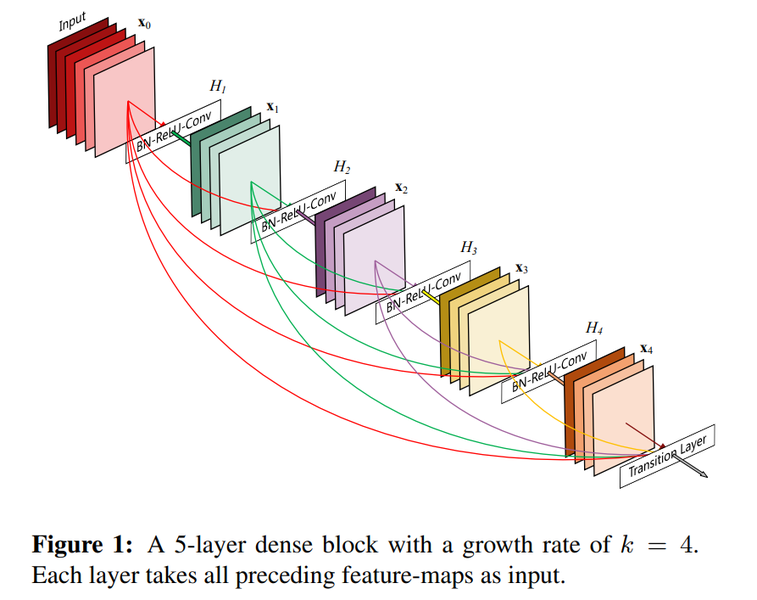

일반적인 컨볼루션 네트워크가 L개의 레이어에 대해 각 레이어 간 하나씩의 연결, 즉 총 L개의 연결을 갖는 것과는 달리, DenseNet의 기본 블록은 L 개의 레이어가 있을 때 레이어 간 L(L+1)/2 개의 직접적인 연결(direct connection)을 만든다.

이러한 연결 구조를 "dense connectivity" 라고 부르며, 아래처럼 H l​로 표기하고 이를 합성함수(composite function)라고 부른다.

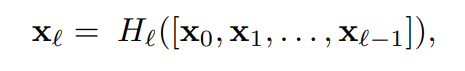

Shortcut connection이 있어 ResNet과 비슷해 보일 수 있지만 ResNet은 shortcut을 원소별로 단순히 더해주었던 반면, DenseNet은 하나하나를 차원으로 쌓아서(concatenate) 하나의 텐서로 만들어 낸다는 사실이 다르다. 

또 이전 ResNet의 connection에 다른 연산이 없었던 것과 달리, 합성함수 H l​은 이 텐서에 대해 배치 정규화(batch normalization, BN), ReLU 활성화 함수, 그리고 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행한다.

**2) Growth Rate**

4개의 채널을 가진 CNN 레이어 4개를 DenseNet 블록으로 만들었을 때, 입력값의 채널 개수가 4인 경우 블록 내 각 레이어의 입력값은 몇 개 채널을 가지게 될까요?

첫 번째 레이어 입력값의 채널은 입력 데이터의 채널 그대로 4이다. 두 번째 레이어의 입력값은 입력 데이터의 채널 값과, 첫 번째 레이어 출력값의 채널인 4을 더해 8이 된다. 그리고 세 번째 레이어는 입력 데이터의 채널 4와 첫 번째 레이어 출력값의 채널 4, 그리고 두 번째 레이어 출력값의 채널 4를 받아 12개의 특성 맵을 입력받고, 네 번째 레이어는 같은 방식으로 16개의 특성 맵을 입력받는다.

입력값의 채널이 4로 시작했으나 진행할수록 특성 맵의 크기가 매우 커지는 것을 볼 수 있다. 이를 제한하기 위해서 논문에서는 **growth rate**이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 개수를 조절한다.
***

### 3. pre-activation ResNet

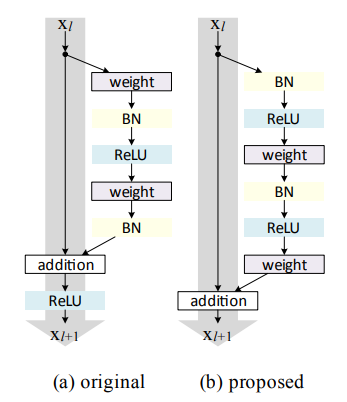

***

### 4. SENet

**1) Squeeze**

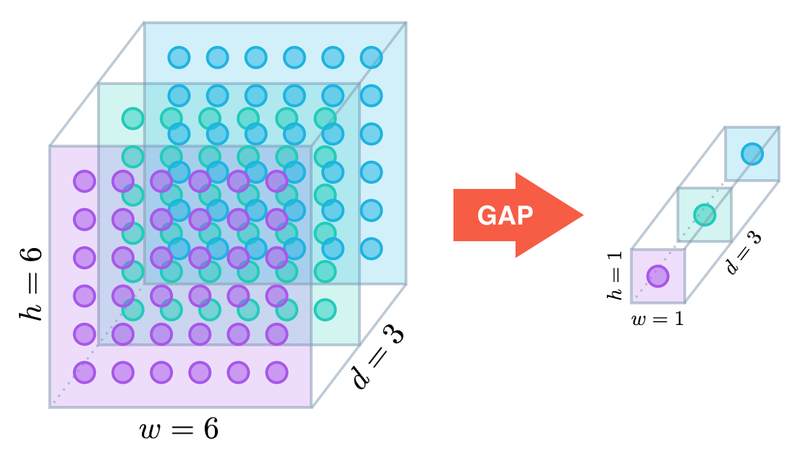

**Squeeze** 는 말 그대로 특성에서 중요한 정보를 짜내는 과정. 

특성 맵의 채널에서 어느 채널이 중요한지 정보를 만들기 위해서는 우선 채널에 따른 정보를 압축해서 가져와야 한다.

어떻게 채널별 정보를 압축할 수 있을까? 

일반 CNN에서도 많이 사용하듯, 풀링(pooling) 기법을 사용하면 된다. 풀링은 보통 커널(kernel) 영역의 정보를 압축하는 데 사용한다. 커널 영역에 대해 최댓값만 남기는 것이 Max Pooling, 평균값을 남기는 것이 Average Pooling이다.

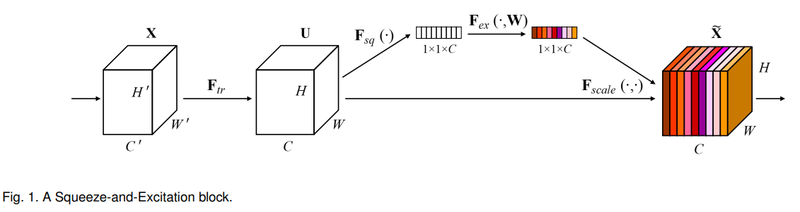

**2) Excitate**

채널별 정보를 짜내는 데 성공했다. 이제 채널별 정보에 따라 어떤 채널을 강조해야 할지 판단하면 된다.

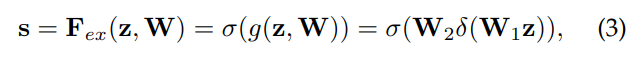

- z 는 위에서 global average pooling을 적용한 특성, 즉 "squeeze" 활동의 결과물이다.

- 이 특성에 W 1​을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 δ 를 거친다.

- 이후 두 번째 W2​를 곱해주는 linear layer를 거치고 마지막으로 시그모이드 활성화 함수 σ을 거친다.

이때 시그모이드를 사용하는 이유는 가장 중요한 하나의 채널만 활성화되는 것이 아닌, 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함이다. 데이터셋에 정답 라벨이 하나뿐인 단순 분류 모델의 활성화 함수로는 소프트맥스(SoftMax)를 사용해서 단 하나의 최댓값을 찾지만, 하나의 대상에도 여러 개의 클래스의 정답 라벨을 지정할 수 있는 다중 라벨 분류(multi label classification)에서는 시그모이드를 사용하는 것과 같은 방식이다.

이렇게 계산된 벡터를 기존의 특성 맵에 채널에 따라서 곱해주어 중요한 채널이 활성화 되도록 만들어준다.

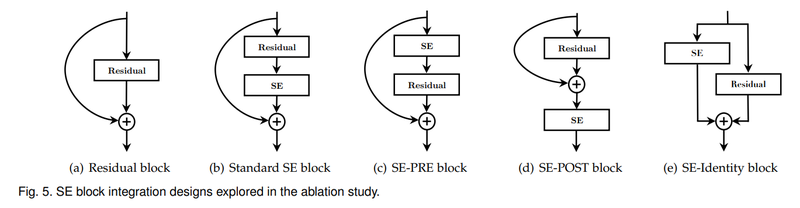
***

# 모델 최적화하기

### 5. Neural Architecture Search

새로운 모델 구조를 고안하고 이해하는 과정을 반복하다 보면, "우리가 딥러닝으로 이미지 분류 문제를 풀기 위해 딥러닝 모델의 파라미터(parameter)를 최적화해 왔듯이 모델의 구조 자체도 최적화할 수는 없을지" 생각하게 된다. 이렇게 여러 가지 네트워크 구조를 탐색하는 것을 아키텍쳐 탐색(architecture search)라고 한다. 그리고 그중 신경망을 사용해 모델의 구조를 탐색하는 접근 방법을 **NAS(neural architecture search)** 라고 한다.

**1) NASNet**

일반적으로 **머신 러닝에서는 그리드 탐색(grid search)** 등으로 실험과 모델 셋팅(config)를 비교하기 위한 자동화된 방법을 사용하곤 한다. 그리드 탐색은 간단히 말하면 모든 조합을 실험해보는 것이다. 

그러나 그리드 탐색과 같은 방법으로 접근할 경우 모델에서 바꿔볼 수 있는 구성의 종류가 매우 많아 머신 러닝 중에서도 학습이 오래 걸리는 딥러닝에서는 적합하지 않다.

**딥러닝에서 모델을 탐색하기 위해 강화학습 모델이 대상 신경망의 구성(하이퍼파라미터)을 조정하면서 최적의 성능을 내도록 하는 방법이 제안되었으며, NASNet은 그중 하나**이다. 

아키텍쳐 탐색을 하는 동안 강화학습 모델은 대상 신경망의 구성을 일종의 변수로 조정하면서 최적의 성능을 내도록 한다. 우리가 지금까지 보아왔던 레이어의 세부 구성, CNN의 필터 크기, 채널의 개수, connection 등이 조정할 수 있는 변수가 된다. 이렇게 네트워크 구성에 대한 요소들을 조합할 수 있는 범위를 탐색 공간(search space)이라고 한다. 이 공간에서 최고의 성능을 낼 수 있는 요소의 조합을 찾는 것이다.

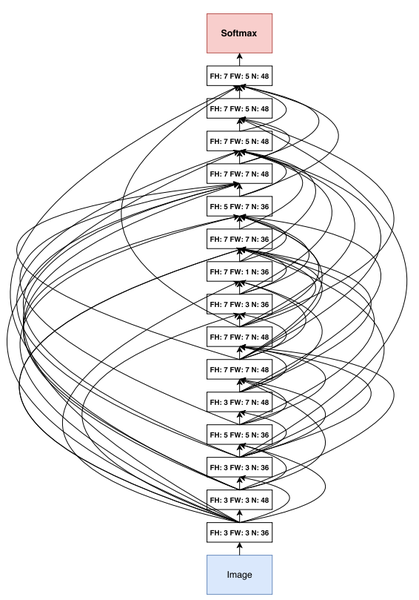

**2) Convolution cell**

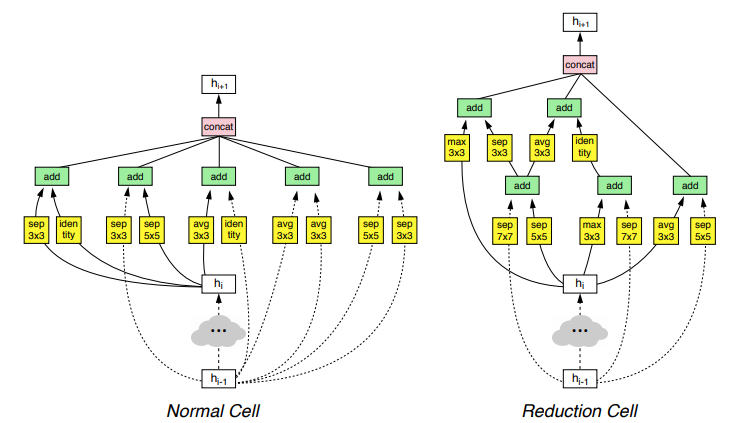

레이어 하나마다의 하이퍼 파라미터를 조절한다면 탐색 공간이 무지막지 방대해질 것이다. 탐색 공간이 넓다는 말은 찾아야 할 영역이 넓다는 의미이고 넓은 곳에서 최적의 포인트를 찾는 데는 당연히 더 오랜 시간이 걸리게된다.

NASNet 논문에서는 이러한 탐색 공간을 줄이기 위해서 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식을 채택한다.

ResNet에는 Residual Block, DenseNet에는 Dense Block이라는 모듈이 사용되는데, 논문에서는 이와 유사한 개념을 **convolution cell**이라고 부른다.

Convolution cell은 **normal cell과 reduction cell**로 구분된다. Normal cell은 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정한다. Reduction cell은 stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록 한다. 논문의 모델은 normal cell과 reduction cell 내부만을 최적화하며, 이렇게 만들어진 convolution cell이 위 그림의 두 가지이다. 두 가지 cell을 조합해 최종 결과 네트워크(NASNet)를 만들었으며, 좀 더 적은 연산과 가중치로 SOTA(state-of-the-art) 성능을 기록했다고 한다.

#### "기존에 사람이 conv block을 만들었다면, NASNet은 강화학습과 RNN을 활용해 block을 설계하였다."
***

### 6. EfficientNet

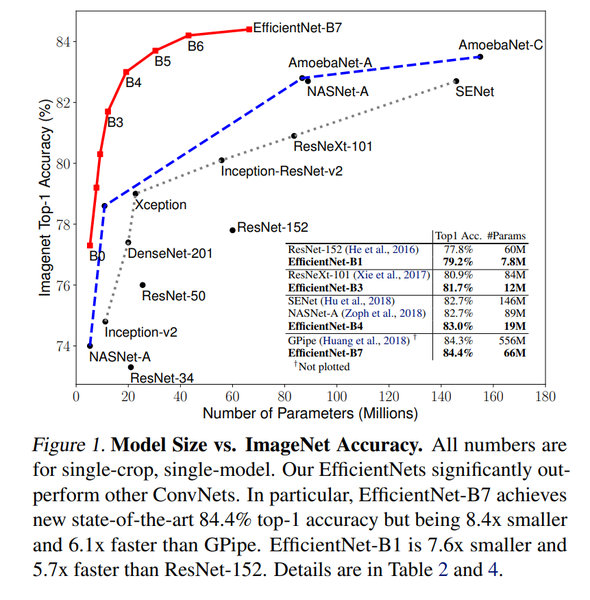

EfficientNet의 강력함은 위의 그래프로 한눈에 볼 수 있다. 기존 모델들의 오류율을 뛰어넘을 뿐만 아니라 모델의 크기인 "Number of Parameters" 또한 최적화된 것을 볼 수 있다. 빨간색 선이 EfficientNet의 모델들이고 그 아래로 각 점에 따라서 이전에 봐왔던 모델들이 있는 것을 볼 수 있다. 정확도를 얻는 데 다른 네트워크들은 무지막지한 파라미터의 수를 사용한 반면 **EfficientNet은 작고 효율적인 네트워크를 사용했다고 볼 수 있다.**

EfficientNet은 우리가 이미지에 주로 사용하는 CNN을 효율적으로 사용할 수 있도록 네트워크의 형태를 조정할 수 있는 **width, depth, resolution** 세 가지 요소에 집중한다. 

여기서 width는 CNN의 채널에 해당한다. 채널을 늘려줄수록 CNN의 파라미터와 특성을 표현하는 차원의 크기를 키울 수 있다. depth는 네트워크의 깊이이다. ResNet은 대표적으로 네트워크를 더 깊게 만들 수 있도록 설계해 성능을 올린 예시이다. 마지막으로 resolution은 입력값의 너비(w)와 높이(h) 크기이다. 입력이 클수록 정보가 많아져 성능이 올라갈 여지가 생기지만 레이어 사이의 특성 맵이 커지는 단점이 있다.

**Compound scaling**

EfficientNet은 앞서 말한 resolution, depth, width를 최적으로 조정하기 위해서 앞선 NAS와 유사한 방법을 사용해 기본 모델(baseline network)의 구조를 미리 찾고 고정해둔다. 모델의 구조가 고정이 되면 효율적인 모델을 찾는다는 커다란 문제가, 개별 레이어의 resolution, depth, width 를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화된다.

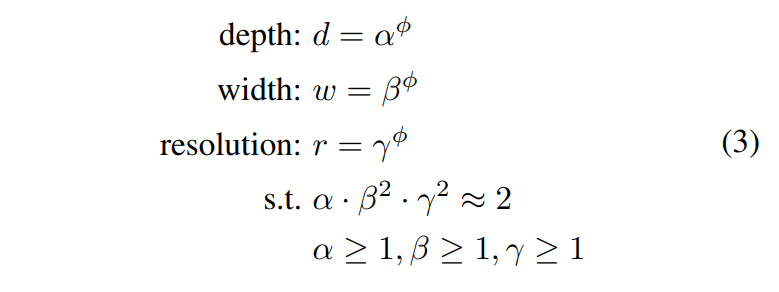

그리고 EfficientNet 논문에서는 resolution, depth, width라는 세 가지 "scaling factor"를 동시에 고려하는 compound scaling을 제안한다. 위 식에서 compound coefficient ϕ는 모델의 크기를 조정하기 위한 계수가 된다. 위 식을 통해 레이어의 resolution, depth, width를 각각 조정하는 것이 아니라 고정된 계수 ϕ에 따라서 변하도록 하면 보다 일정한 규칙에 따라(in a principled way) 모델의 구조가 조절되도록 할 수 있다.

논문은 우선 ϕ를 1로 고정한 뒤 resolution과 depth, width을 정하는 α,β,γ의 최적값을 찾는다. 논문에서는 앞서 설명했던 그리드 탐색으로 α,β,γ을 찾을 수 있었다고 설명한다. 이후 α,β,γ, 즉 resolution과 depth, width의 기본 배율을 고정한 뒤 compound coefficient ϕ를 조정하여 모델의 크기를 조정한다.